
========================================================<br>
<br>
   File name   : YOLOv3_colab_training.ipynb<br>
   Author      : PyLessons<br>
   Created date: 2020-05-26<br>
   Website     : https://pylessons.com/YOLOv3-TF2-GoogleColab<br>
   GitHub      : https://github.com/pythonlessons/TensorFlow-2.x-YOLOv3<br>
   Description : Train custom model on Google colab tutorial<br>
<br>
================================================================


**Open this notebook from google drive**<br>
**Go to "Edit" -> "Notebook settings" and enable GPU.**


In [1]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Tue Aug  4 13:36:02 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Connect and authorize google drive with google colab:**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
gdrive	sample_data


**Open our project "TensorFlow-2.x-YOLOv3" direcotry in google drive:**

In [3]:
%cd gdrive/My\ Drive/University of Toronto: Year 3/APS360 - Fundamentals of Artificial Intelligence/APS360 - Group Project/YOLOv3-master/
!ls

/content/gdrive/My Drive/University of Toronto: Year 3/APS360 - Fundamentals of Artificial Intelligence/APS360 - Group Project/YOLOv3-master
2_names.txt	     detection_demo.py	   requirements.txt
2_test.txt	     IMAGES		   temp
2_train.txt	     log		   tools
checkpoints	     model_data		   train.py
custom_dataset	     new_test_set_cropped  yolov3
detection_custom.py  __pycache__	   YOLOv3_colab_training.ipynb


**Install all required libraries for our project:**

In [4]:
!pip install -r ./requirements.txt

     |████████████████████████████████| 61kB 4.7MB/s 
     |████████████████████████████████| 3.3MB 18.6MB/s 
     |████████████████████████████████| 6.5MB 37.4MB/s 
  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=3b8f164ffaa34ebdee993400c5083d628afc0b739853caa2ff80974824c39d35
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
  Found existing installation: rsa 4.6
    Uninstalling rsa-4.6:
      Successfully uninstalled rsa-4.6
  Found existing installation: botocore 1.17.32
    Uninstalling botocore-1.17.32:
      Successfully uninstalled botocore-1.17.32


**Test if TensorFlow works with gpu for you, in output should see similar results:**
```
2.2.0
'/device:GPU:0'
```

In [6]:
import tensorflow as tf
print(tf.__version__)
tf.test.gpu_device_name()

2.3.0


'/device:GPU:0'

**Test by loading trained model:**

In [7]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import tensorflow as tf
from yolov3.yolov3 import Create_Yolov3
from yolov3.utils import load_yolo_weights, detect_image
from yolov3.configs import *

input_size = YOLO_INPUT_SIZE


**Run `XML_to_YOLOv3.py` script to convert XML files to YOLOv3 annotations files:**

In [ ]:
!python tools/XML_to_YOLOv3.py

/content/gdrive/My Drive/University of Toronto: Year 3/APS360 - Fundamentals of Artificial Intelligence/APS360 - Group Project/YOLOv3-master/custom_dataset/train
/content/gdrive/My Drive/University of Toronto: Year 3/APS360 - Fundamentals of Artificial Intelligence/APS360 - Group Project/YOLOv3-master/custom_dataset/train/img0.png 164,40,223,95,0
/content/gdrive/My Drive/University of Toronto: Year 3/APS360 - Fundamentals of Artificial Intelligence/APS360 - Group Project/YOLOv3-master/custom_dataset/train/img1.png 176,50,220,95,0
/content/gdrive/My Drive/University of Toronto: Year 3/APS360 - Fundamentals of Artificial Intelligence/APS360 - Group Project/YOLOv3-master/custom_dataset/train/img2.png 161,42,218,94,0
/content/gdrive/My Drive/University of Toronto: Year 3/APS360 - Fundamentals of Artificial Intelligence/APS360 - Group Project/YOLOv3-master/custom_dataset/train/img3.png 154,38,221,98,0
/content/gdrive/My Drive/University of Toronto: Year 3/APS360 - Fundamentals of Artificial

**Start training custom model:**

In [ ]:
from train import *
tf.keras.backend.clear_session()
main()

epoch: 0 step:    2/61, lr:0.000002, giou_loss:   3.59, conf_loss:1954.03, prob_loss:   2.13, total_loss:1959.75
epoch: 0 step:    3/61, lr:0.000002, giou_loss:   2.88, conf_loss:1859.27, prob_loss:   1.84, total_loss:1863.98
epoch: 0 step:    4/61, lr:0.000003, giou_loss:   3.03, conf_loss:1888.24, prob_loss:   1.90, total_loss:1893.18
epoch: 0 step:    5/61, lr:0.000004, giou_loss:   3.33, conf_loss:1830.42, prob_loss:   2.07, total_loss:1835.81
epoch: 0 step:    6/61, lr:0.000005, giou_loss:   3.04, conf_loss:1832.62, prob_loss:   1.98, total_loss:1837.65
epoch: 0 step:    7/61, lr:0.000006, giou_loss:   3.21, conf_loss:1852.52, prob_loss:   1.93, total_loss:1857.65
epoch: 0 step:    8/61, lr:0.000007, giou_loss:   3.04, conf_loss:1793.62, prob_loss:   2.00, total_loss:1798.66


KeyboardInterrupt: ignored

**Load YOLOv3 Weights:**

In [8]:
yolo = Create_Yolov3(input_size=input_size, CLASSES=TRAIN_CLASSES)
yolo.load_weights("./checkpoints/yolov3_custom") # use keras weights

**Test Detection:**

Pokemon(s) Found in Image at:
[Start X, Start Y, End X, End Y]: [[223, 41, 469, 222]]


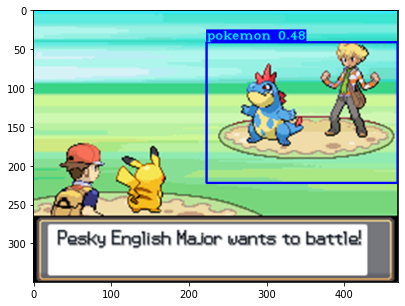

In [ ]:
image_path   = "./custom_dataset/0/"
orig, img, locs = detect_image(yolo, image_path, "", input_size=input_size, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print("Pokemon(s) Found in Image at:")
print("[Start X, Start Y, End X, End Y]:", locs)

plt.figure(figsize=(10,5))
plt.imshow(image)

In [14]:
from PIL import Image
import cv2

for i in range(48):
    print(i)
    image_path   = r"./new_test_set_cropped/3/img" + str(i) + ".jpg"
    orig, img, locs = detect_image(yolo, image_path, "", input_size=input_size, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
    cv2.imwrite(image_path, img)

    # for crop in locs:
        # x1, y1, x2, y2 = crop
        # im = Image.open(image_path)
        # im1 = im.crop((x1, y1, x2, y2))
        # rgb_im = im1.convert('RGB')
        # rgb_im.save(image_path)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
